### <center><font> Tutorial #6 Computer- and robot-assisted surgery</font></center>
## <center><font> Segmentation I</font></center>
<center>&copy; Sebastian Bodenstedt, National Center for Tumor Diseases (NCT) Dresden<br>
    <a href="https://www.nct-dresden.de/"><img src="https://www.nct-dresden.de/++theme++nct/images/logo-nct-en.svg"></a> </center>

## <center><font>Preperation</font></center>

For this tutorial, we will utilize the OpenCV, Matplotlib and NumPy:

In [1]:
import cv2
import numpy as np
# Force Matplotlib to display data directly in Jupyter
%matplotlib inline 
from matplotlib import pyplot as plt

## <center><font>Basic functions</font></center>
We define a function for displaying grayscale images

In [2]:
def show_gray(img, canvas=plt, title=""): # Later we want to draw on a different underground, so we define this as a parameter
    canvas.imshow(img, cmap='gray', vmin=0, vmax=255)
    if not title == "":
        canvas.set_title(title)

We can utilize OpenCV to read one of the images from HD and NumPy to process the data. The image can be converted to grayscale and displayed:Review

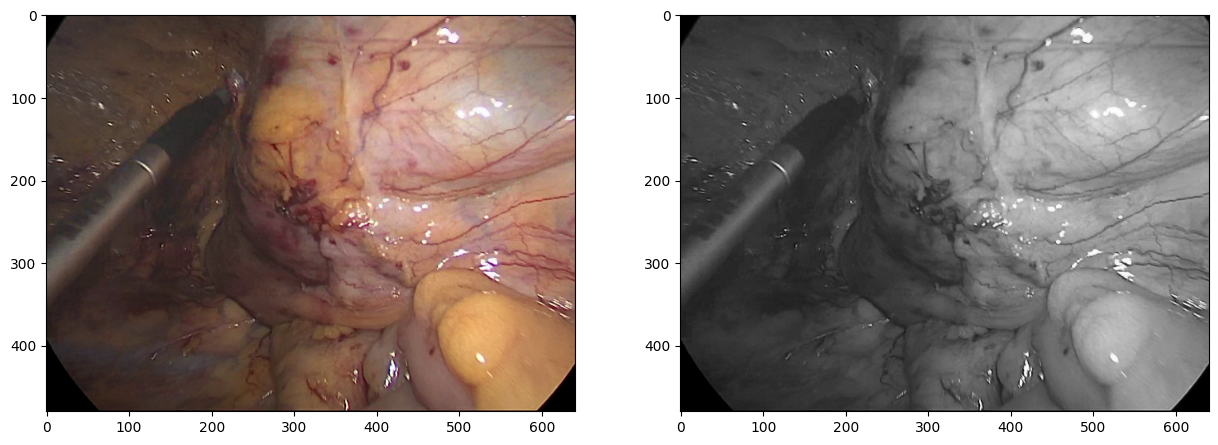

In [3]:
img = cv2.imread("Exercises/SegmentationI/img_01_raw.png") # Read image from HD

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB

figure, axis = plt.subplots(1, 2, figsize=(15, 15)) # subplots let you visualize multiple outputs simultanously

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert BGR to grayscale

axis[0].imshow(img_rgb)
show_gray(img_gray, axis[1])

## <center><font>Segmentation with OpenCV and Scikit Image</font></center>


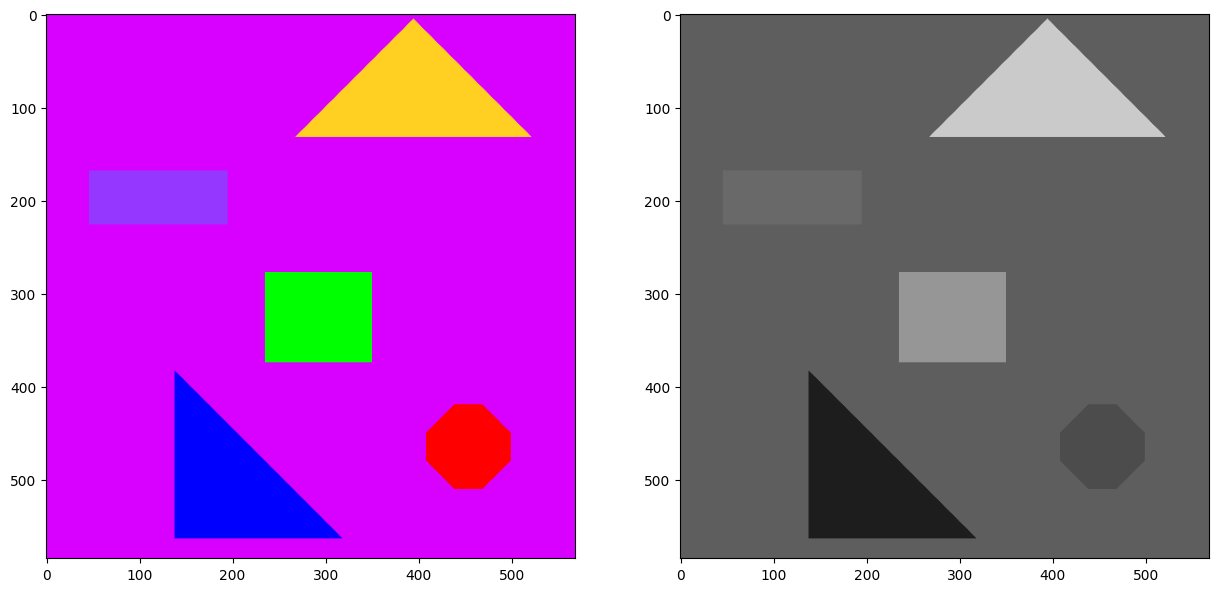

In [5]:
img = cv2.imread("Exercises/SegmentationI/image_n0.png")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB

figure, axis = plt.subplots(1, 2, figsize=(15, 15)) # subplots let you visualize multiple outputs simultanously

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert BGR to grayscale

axis[0].imshow(img_rgb)
show_gray(img_gray, axis[1])

We can use the OpenCV to perform a simple threshold segmentation:

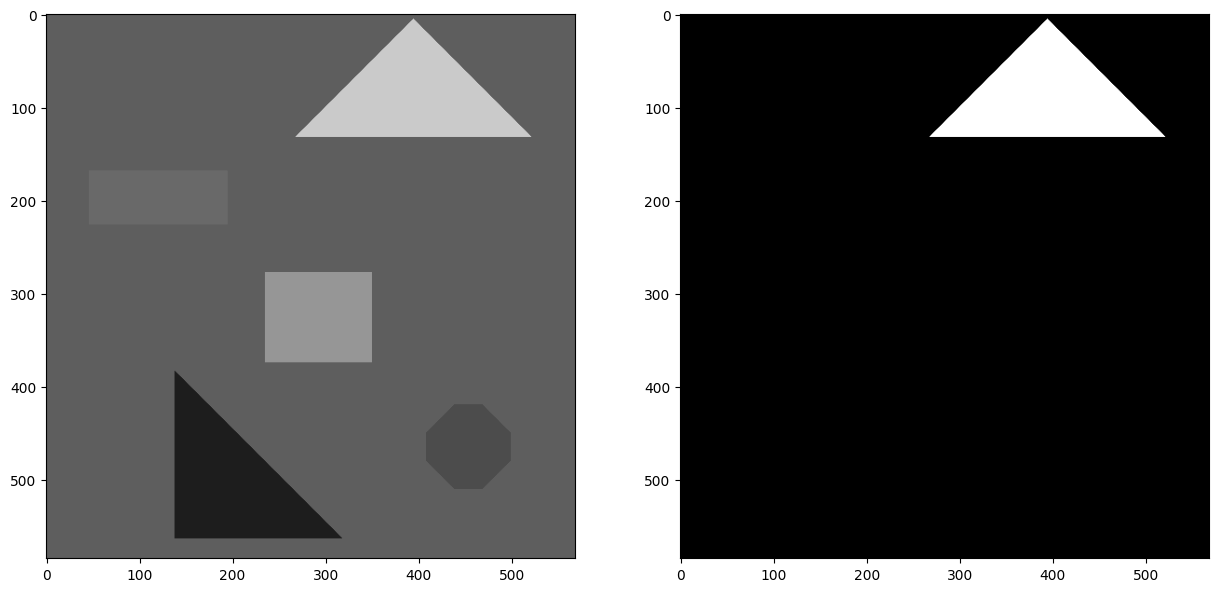

In [6]:
threshold = 200
max_value = 255

threshold_type = cv2.THRESH_BINARY
#threshold_type = cv2.THRESH_BINARY_INV

_, dst = cv2.threshold(img_gray, threshold, max_value, threshold_type)

figure, axis = plt.subplots(1, 2, figsize=(15, 15)) # subplots let you visualize multiple outputs simultanously

show_gray(img_gray, axis[0])
show_gray(dst, axis[1])

In [7]:
def calc_histogram(image):
    num_values = 256 # Number of values to consider. For 8-bit 256 values are possible

    histogram = np.zeros(num_values, dtype=np.int64) # Initialize histogram with zeros
    
    for i in range(num_values): # Iterate over all possible values
        histogram[i] = np.sum(image == i) # Count occurences in data
    # OR:
    #histogram = cv2.calcHist([img_gray],[0],None,[256],[0,256])
    #histogram = hist.reshape(-1) # Modify shape
    normalized_histogram = histogram/(image.shape[0]*image.shape[1]) # Normalize histogram

    return normalized_histogram

We can also use Otsu thresholding to segment individual objects:

[ 30  77  95 107 151]


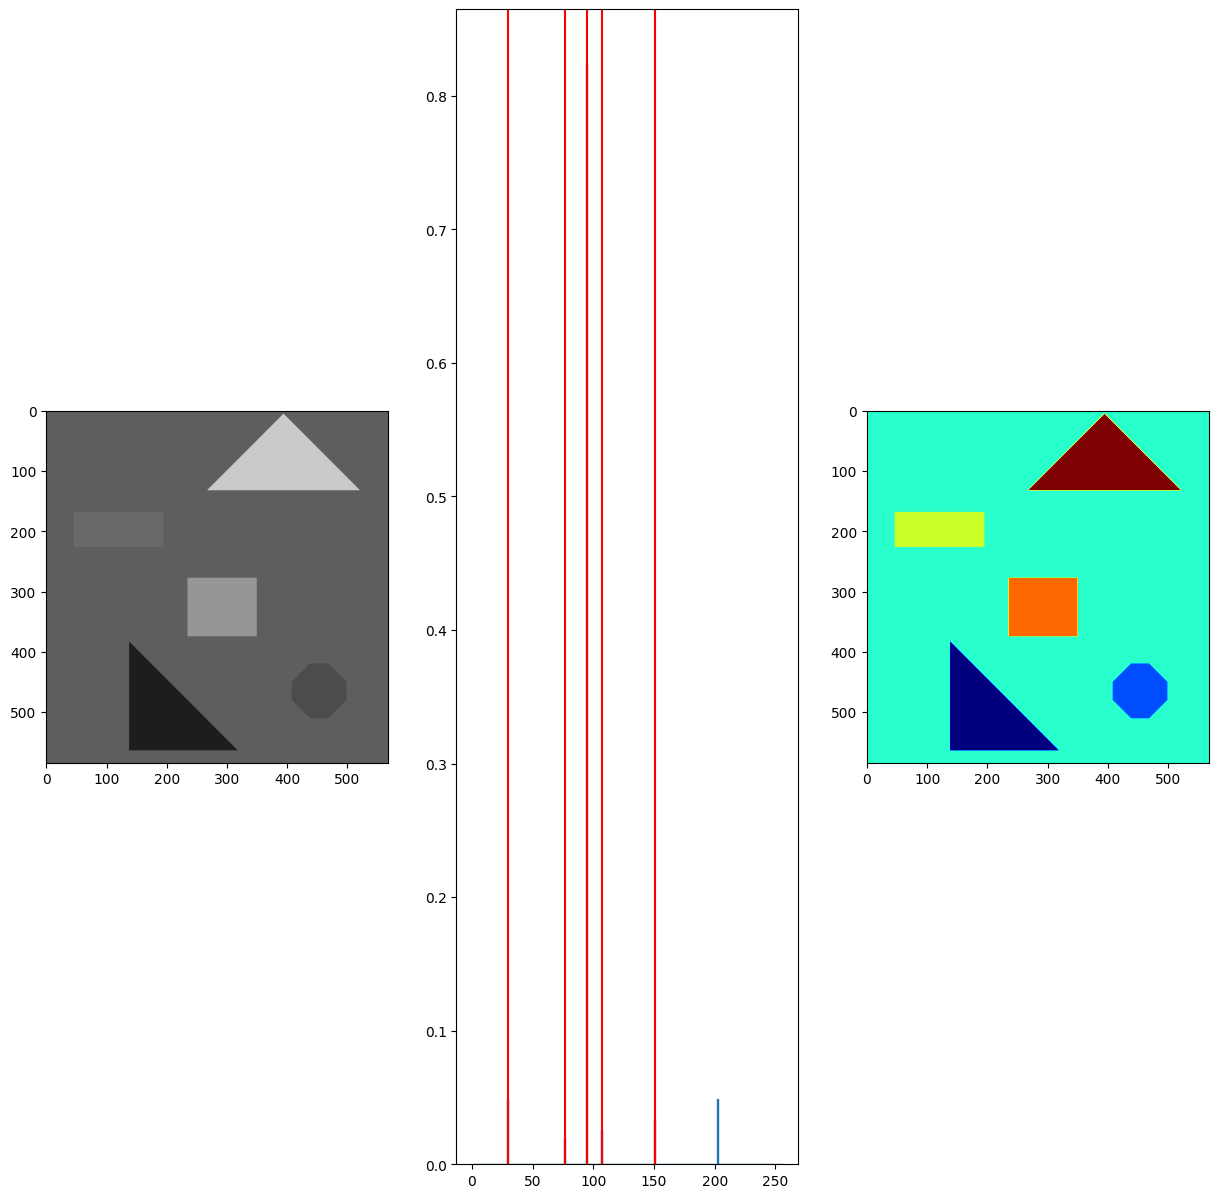

In [10]:
from skimage.filters import threshold_multiotsu

classes = 6

thresholds_rgb = threshold_multiotsu(img_gray, classes) + 1 # Calculate the thresholds for the histogram bins

print(thresholds_rgb)

figure, axis = plt.subplots(1, 3, figsize=(15, 15)) # subplots let you visualize multiple outputs simultanously

show_gray(img_gray, axis[0])

hist = calc_histogram(img_gray) # Calculate histogram
axis[1].stairs(hist)
for thresh in thresholds_rgb: # Show bins
    axis[1].axvline(thresh, color='r')
    
regions = np.digitize(img_gray, bins=thresholds_rgb) # Assign each pixel to its bin

axis[2].imshow(regions, cmap='jet')

Sometimes it makes sense to examine the HSV color space:

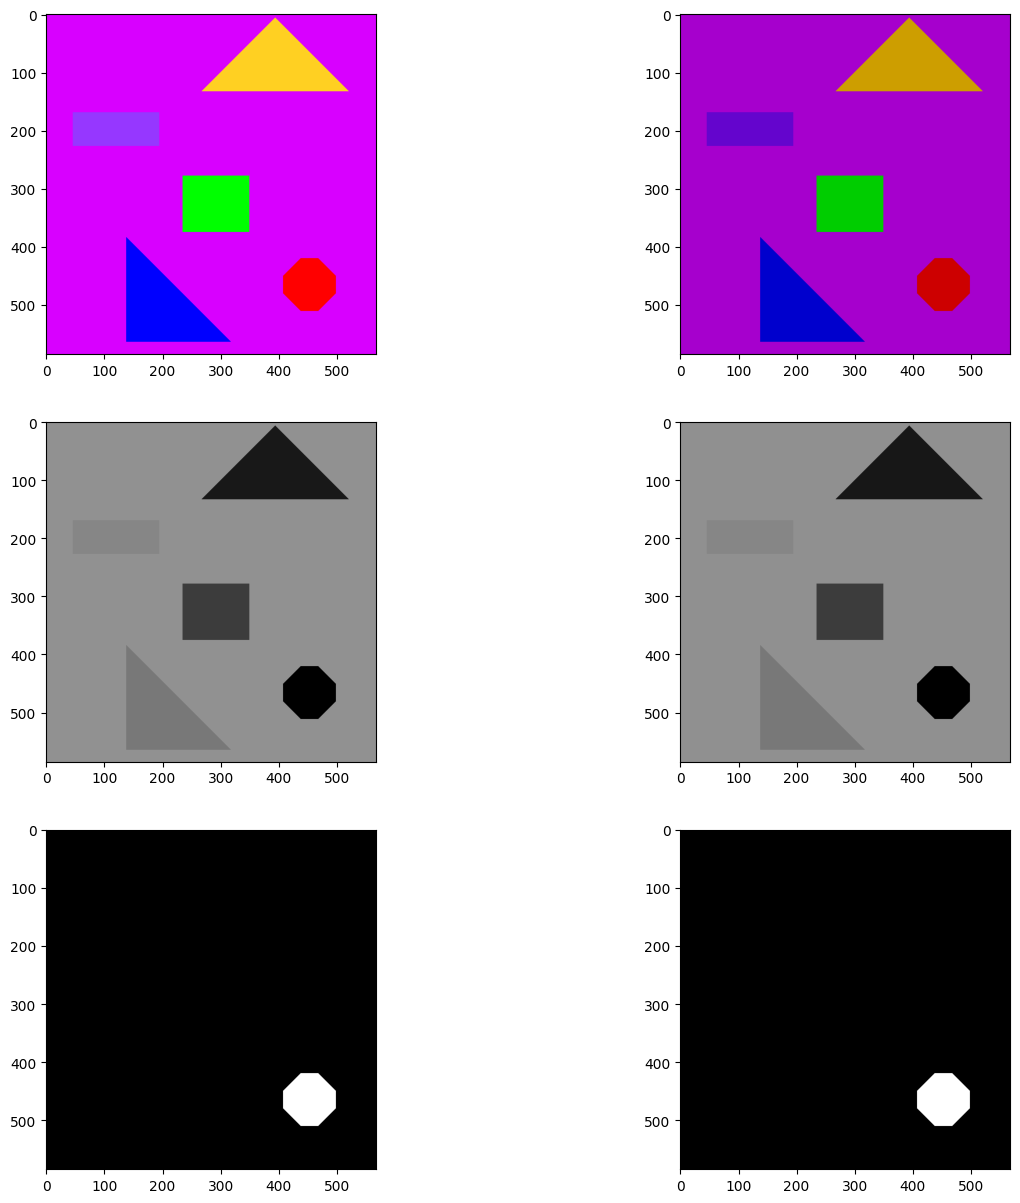

In [11]:
figure, axis = plt.subplots(3, 2, figsize=(15, 15)) # subplots let you visualize multiple outputs simultanously

img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

axis[0, 0].imshow(img_rgb)
show_gray(img_hsv[:, :, 0], axis[1, 0])
ind_red = img_hsv[:, :, 0] == 0
show_gray(ind_red*255, axis[2, 0])

img_rgb_mod = img_rgb.astype(np.int64) - 50
img_rgb_mod = np.clip(img_rgb_mod, 0, 255).astype(np.uint8)

img_hsv_mod = cv2.cvtColor(img_rgb_mod, cv2.COLOR_RGB2HSV)

axis[0, 1].imshow(img_rgb_mod)
show_gray(img_hsv_mod[:, :, 0], axis[1, 1])
ind_red_mod = img_hsv_mod[:, :, 0] == 0
show_gray(ind_red_mod*255, axis[2, 1])

We will now try to implement our own version of the Region Growing algorithm. First we load a suitable image:

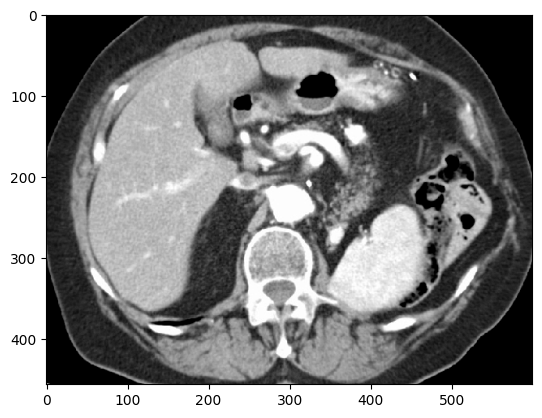

In [13]:
img = cv2.imread("Exercises/SegmentationI/ct.png")

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

show_gray(img_gray)

We then define a few seeds:

In [14]:
seeds = [[300, 100],
         [200, 120],
         [150, 90],
         [100, 165]]

# Lets draw the points
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for seed in seeds:
    # TODO Draw points on image
    
plt.imshow(img_rgb)

IndentationError: expected an indented block after 'for' statement on line 9 (3030569765.py, line 12)

Now we implement our own region growing algorithm:

In [ ]:
def region_growing(image, seeds, threshold):
    segmentation = np.zeros(image.shape, dtype=bool)
    visited = np.zeros(image.shape, dtype=bool)
    
    # TODO Implement ;)               
        
    return segmentation
    

We then try out our new routine on an image:

In [ ]:
seeds = [[300, 100],
         [200, 120],
         [150, 90],
         [100, 165]]

threshold = 1

seg = region_growing(img_gray, seeds, threshold)

seg = seg.astype(np.uint8)*255

figure, axis = plt.subplots(1, 3, figsize=(15, 15)) # subplots let you visualize multiple outputs simultanously

show_gray(img_gray, axis[0])
axis[1].imshow(img_rgb)
show_gray(seg, axis[2])

We can also try out Active Contours:

In [ ]:
# We define first a circle
radius = 35
y = 300
x = 285
s = np.linspace(0, 2*np.pi, 200)
r = y + radius*np.sin(s)
c = x + radius*np.cos(s)
init = np.array([r, c]).T

show_gray(img_gray)
plt.plot(init[:, 1], init[:, 0], '--r', lw=3)

In [ ]:
from skimage.segmentation import active_contour

snake = active_contour(img_gray, init, alpha=0.015, beta=10, gamma=0.001)

figure, axis = plt.subplots(1, 2, figsize=(15, 15)) # subplots let you visualize multiple outputs simultanously

show_gray(img_gray, axis[0])
axis[0].plot(init[:, 1], init[:, 0], '--r', lw=3)

show_gray(img_gray, axis[1])
axis[1].plot(snake[:, 1], snake[:, 0], '-b', lw=3)

## <center><font>Segmentation with OpenCV and Scikit Image</font></center>
Try to find the hidden message ;)

In [ ]:
img = cv2.imread("Exercises/SegmentationI/hidden.png")

plt.imshow(img)